### **Import Libraries**

In [1]:
!pip install ppscore

zsh:1: command not found: pip


In [2]:
import ppscore as pps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from src import Experiment as ex
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, precision_recall_curve
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict, cross_val_score
%matplotlib inline

### **Load in the data**

In [3]:
df = pd.read_csv('data.csv')

### **Perform data cleaning & EDA**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.drop(['Unnamed: 32'], axis=1, inplace=True)

In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df.duplicated().sum()

0

In [8]:
ex.memory_stats(df)

,Memory
Index,128
id,4552
diagnosis,33002
radius_mean,4552
texture_mean,4552
perimeter_mean,4552
area_mean,4552
smoothness_mean,4552
compactness_mean,4552
concavity_mean,4552


In [9]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


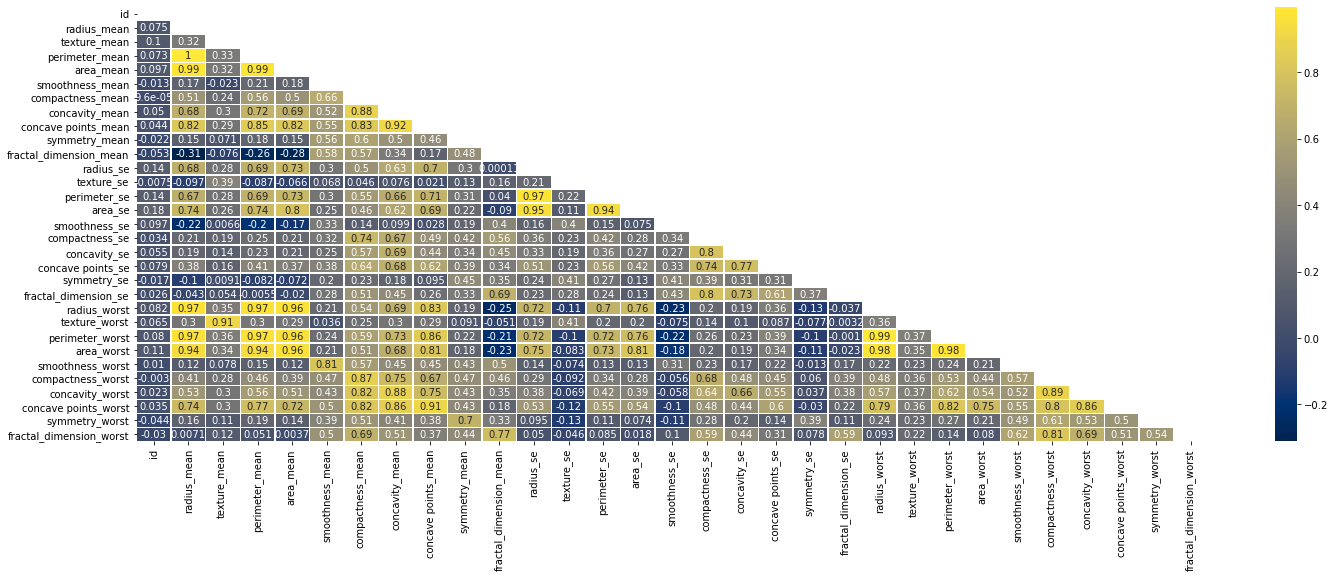

In [11]:
ex.corr_heatmap(df, mask=True)

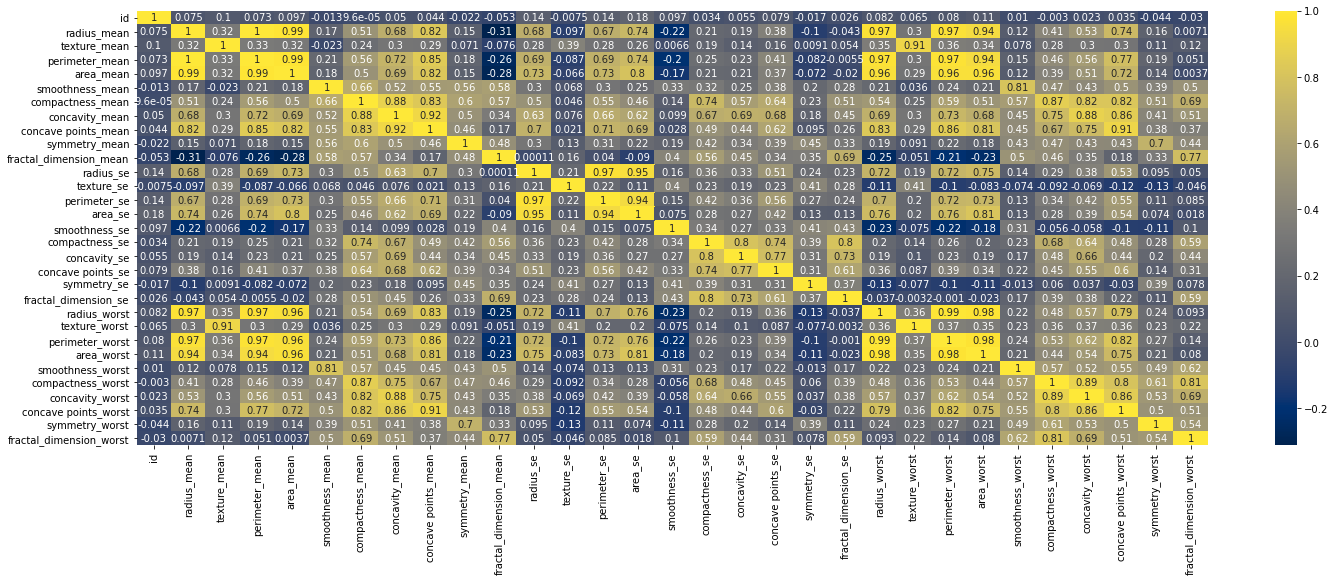

In [12]:
ex.corr_heatmap(df, mask=False)

<AxesSubplot:title={'center':'PPS matrix'}, xlabel='feature', ylabel='target'>

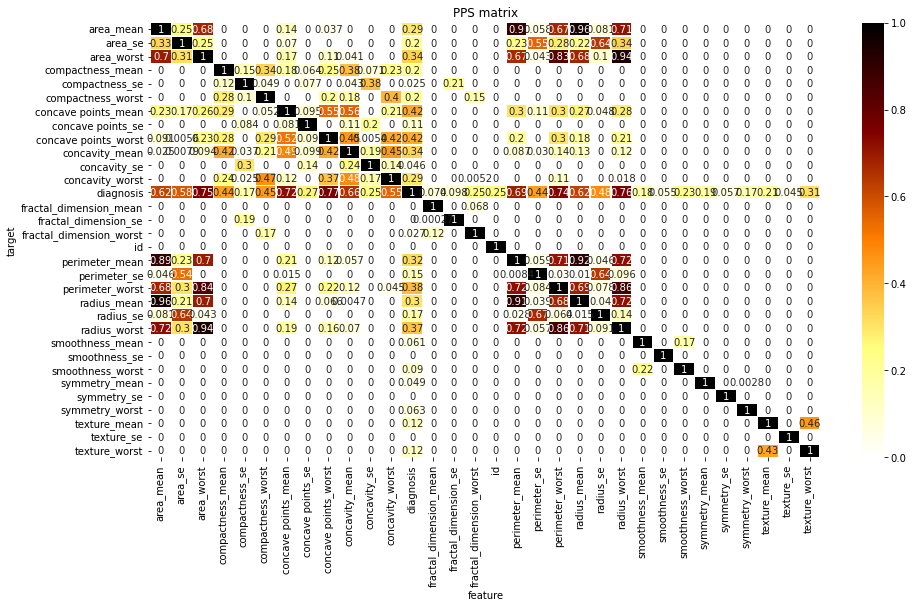

In [13]:
ex.pps_heatmap(df)

In [14]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [15]:
X = df[['id', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

In [16]:
X.shape

(569, 31)

In [17]:
specs = {
    "M": 0,
    "B": 1
}
df['diagnosis'] = df['diagnosis'].map(specs)

In [18]:
y = df['diagnosis']

In [19]:
y.shape

(569,)

### **Model Selection**

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [21]:
rf = RandomForestClassifier(n_estimators=1000)

In [22]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [23]:
ex.print_score(rf, X_train, X_test, y_train, y_test, train=True)
print("\n*******************************************************************\n")
ex.print_score(rf, X_train, X_test, y_train, y_test, train=False)

Train Score:

Accuracy Score:1.0000

ROC AUC:1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
           1       1.00      1.00      1.00       286

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455
 

Confusion Matrix: 
 [[169   0]
 [  0 286]] 

Average Accuracy: 0.9670

Average Standard Deviation 0.0245


*******************************************************************

Test Score:

Accuracy Score:0.9649

ROC AUC:0.9581

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114
 

Confusion M

In [24]:
tree = DecisionTreeClassifier(random_state=42)

In [25]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [26]:
ex.print_score(tree, X_train, X_test, y_train, y_test, train=True)
print("\n*******************************************************************\n")
ex.print_score(tree, X_train, X_test, y_train, y_test, train=False)

Train Score:

Accuracy Score:1.0000

ROC AUC:1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
           1       1.00      1.00      1.00       286

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455
 

Confusion Matrix: 
 [[169   0]
 [  0 286]] 

Average Accuracy: 0.9276

Average Standard Deviation 0.0507


*******************************************************************

Test Score:

Accuracy Score:0.9386

ROC AUC:0.9369

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.93      0.92        43
           1       0.96      0.94      0.95        71

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114
 

Confusion M

In [27]:
bag_clf = BaggingClassifier(n_estimators=100, bootstrap=True, oob_score=True,
                            random_state=42)

In [28]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(n_estimators=100, oob_score=True, random_state=42)

In [29]:
ex.print_score(bag_clf, X_train, X_test, y_train, y_test, train=True)
print("\n*******************************************************************\n")
ex.print_score(bag_clf, X_train, X_test, y_train, y_test, train=False)

Train Score:

Accuracy Score:1.0000

ROC AUC:1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
           1       1.00      1.00      1.00       286

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455
 

Confusion Matrix: 
 [[169   0]
 [  0 286]] 

Average Accuracy: 0.9604

Average Standard Deviation 0.0214


*******************************************************************

Test Score:

Accuracy Score:0.9561

ROC AUC:0.9510

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114
 

Confusion M

In [30]:
bag_tree = BaggingClassifier(tree, n_estimators=100, oob_score=False)

In [31]:
bag_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=100)

In [32]:
ex.print_score(bag_tree, X_train, X_test, y_train, y_test, train=True)
print("\n*******************************************************************\n")
ex.print_score(bag_tree, X_train, X_test, y_train, y_test, train=False)

Train Score:

Accuracy Score:1.0000

ROC AUC:1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
           1       1.00      1.00      1.00       286

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455
 

Confusion Matrix: 
 [[169   0]
 [  0 286]] 

Average Accuracy: 0.9539

Average Standard Deviation 0.0247


*******************************************************************

Test Score:

Accuracy Score:0.9561

ROC AUC:0.9510

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114
 

Confusion M

In [33]:
bag_rf = BaggingClassifier(rf, n_estimators=100, oob_score=False, bootstrap=False)

In [34]:
bag_rf.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=1000),
                  bootstrap=False, n_estimators=100)

In [35]:
ex.print_score(bag_rf, X_train, X_test, y_train, y_test, train=True)
print("\n*******************************************************************\n")
ex.print_score(bag_rf, X_train, X_test, y_train, y_test, train=False)

Train Score:

Accuracy Score:1.0000

ROC AUC:1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
           1       1.00      1.00      1.00       286

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455
 

Confusion Matrix: 
 [[169   0]
 [  0 286]] 

Average Accuracy: 0.9714

Average Standard Deviation 0.0171


*******************************************************************

Test Score:

Accuracy Score:0.9649

ROC AUC:0.9581

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114
 

Confusion M

In [36]:
ada = AdaBoostClassifier(n_estimators=1000)

In [37]:
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1000)

In [38]:
ex.print_score(ada, X_train, X_test, y_train, y_test, train=True)
print("\n*******************************************************************\n")
ex.print_score(ada, X_train, X_test, y_train, y_test, train=False)

Train Score:

Accuracy Score:1.0000

ROC AUC:1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
           1       1.00      1.00      1.00       286

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455
 

Confusion Matrix: 
 [[169   0]
 [  0 286]] 

Average Accuracy: 0.9758

Average Standard Deviation 0.0184


*******************************************************************

Test Score:

Accuracy Score:0.9737

ROC AUC:0.9697

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114
 

Confusion M

In [39]:
ex.mean_accuracy_score(rf, X_test, y_test, cv=10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    4.9s remaining:    3.3s
Average Accuracy: 0.956060606060606
Average Standard Deviation: 0.04401769407979987
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.1s finished


### **Precision Recall Curve**

In [40]:
y_score = cross_val_predict(
    ada, X_train, y_train, cv=3, method='decision_function'
)

In [41]:
precision, recall, threshold = precision_recall_curve(y_train, y_score)

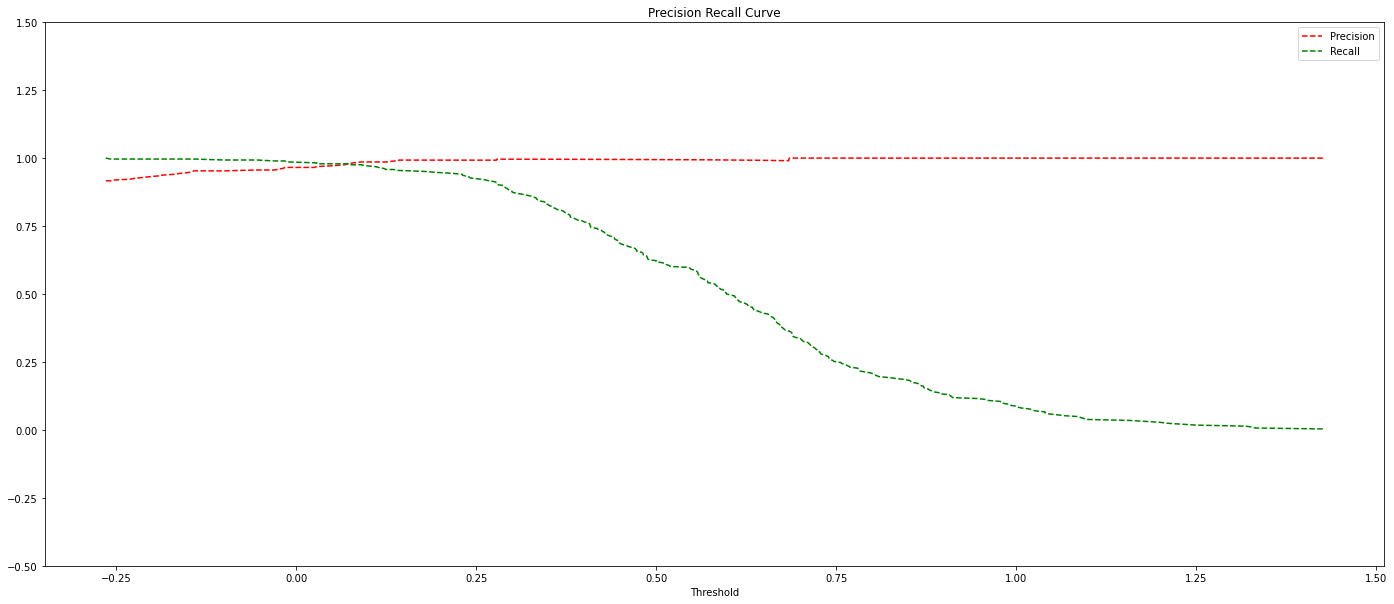

In [42]:
ex.plot_prc_figure(precision, recall, threshold)

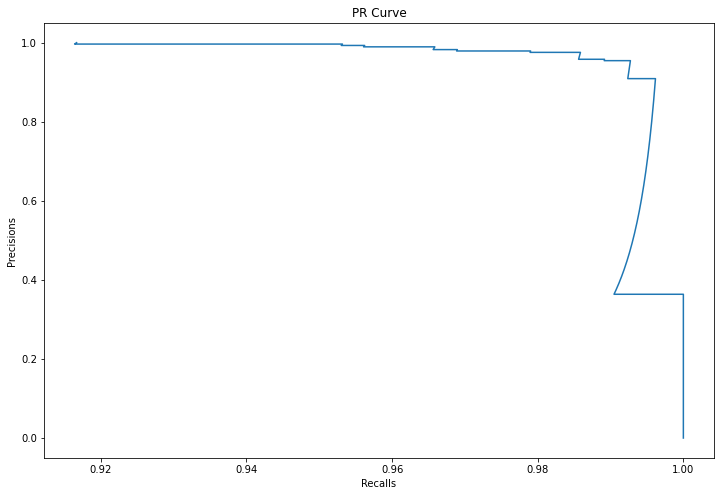

In [43]:
 plt.figure(figsize=(12, 8))
 plt.plot(precision, recall)
 plt.xlabel('Recalls')
 plt.ylabel("Precisions")
 plt.title("PR Curve")
 plt.show()

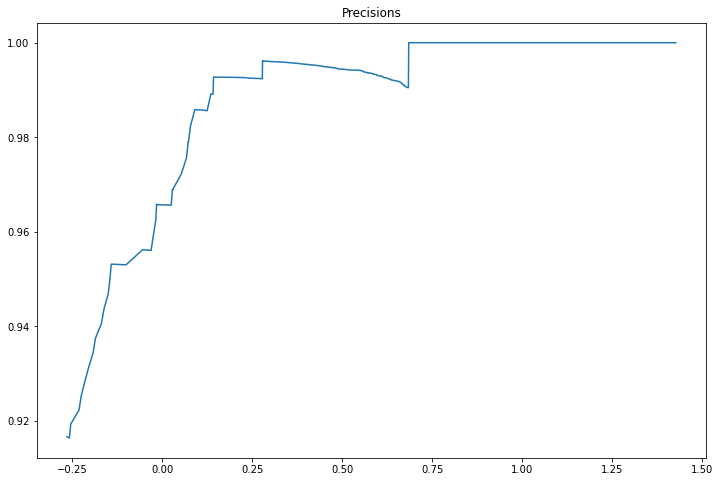

In [44]:
plt.figure(figsize=(12, 8))
plt.plot(threshold, precision[:-1])
plt.title('Precisions')
plt.show()

#### **Manipulating the PR Curve to attain a 98% Precision score**

In [45]:
len(precision)

313

In [46]:
len(threshold)

312

In [47]:
idx = len(precision[precision < 0.98])

In [48]:
threshold[idx]

0.07829907481211464

In [49]:
y_train_pred = (y_score > threshold[idx])

##### **Print all metrics**

In [50]:
precision_score(y_train, y_train_pred)

0.9858657243816255

In [51]:
recall_score(y_train, y_train_pred)

0.9755244755244755

In [52]:
print("CLASSIFICATION REPROT: \n{}\n".format(
    classification_report(y_train, y_train_pred)
))

CLASSIFICATION REPROT: 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       169
           1       0.99      0.98      0.98       286

    accuracy                           0.98       455
   macro avg       0.97      0.98      0.97       455
weighted avg       0.98      0.98      0.98       455




In [53]:
print('Confusion Matrix: \n{}\n'.format(
    confusion_matrix(y_train, y_train_pred),
    index=pd.MultiIndex.from_product(
        [['Actual'], ['Negative', 'Positive']]
    ),
    columns=pd.MultiIndex.from_product(
        [['Predicted'], ['Negative', 'Positive']]
    )
))

Confusion Matrix: 
[[165   4]
 [  7 279]]



In [54]:
accuracy_score(y_train, y_train_pred)

0.9758241758241758

In [55]:
print("Average Accuracy:{0:.3f} \n".format(np.mean(accuracy_score(y_train, y_train_pred))))
print("Accuracy SD:{0:.3f} \n".format(np.std(accuracy_score(y_train, y_train_pred))))

Average Accuracy:0.976 

Accuracy SD:0.000 



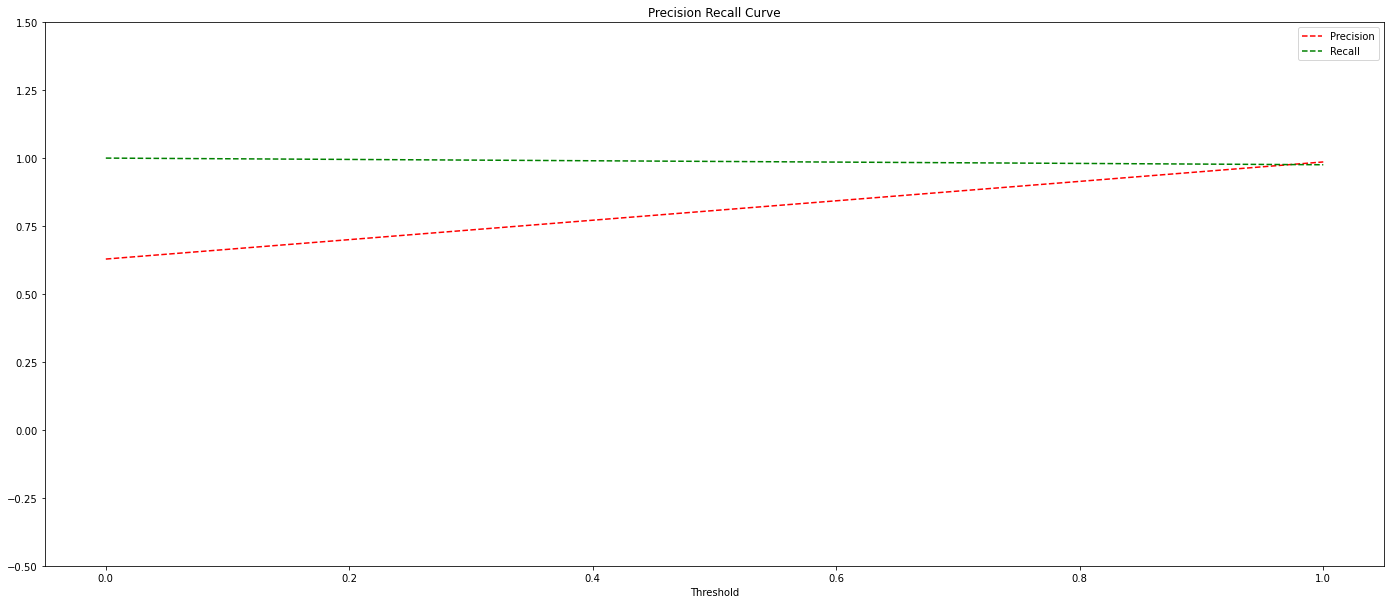

In [56]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_pred)
ex.plot_prc_figure(precisions, recalls, thresholds)

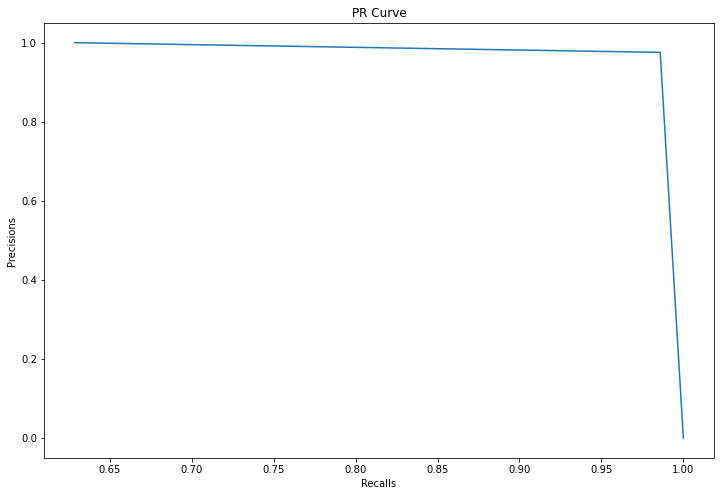

In [57]:
 plt.figure(figsize=(12, 8))
 plt.plot(precisions, recalls)
 plt.xlabel('Recalls')
 plt.ylabel("Precisions")
 plt.title("PR Curve")
 plt.show()

### **Receiver Operating Characteristics Curve**

In [58]:
fpr, tpr, thresh = roc_curve(y_train, y_score)

ROC Score: 0.9939380146480739


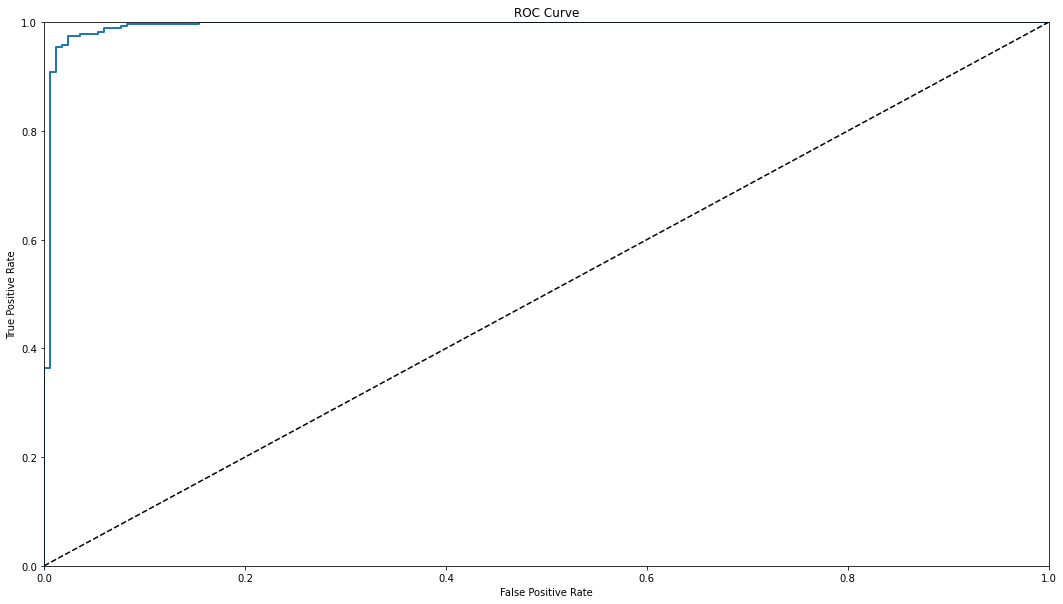

In [60]:
ex.roc_curve_plot(fpr, tpr, y_train, y_score)

##### **Using altered precision**

In [61]:
nfpr, ntpr, nthresh = roc_curve(y_train, y_train_pred)

ROC Score: 0.9759279182356104


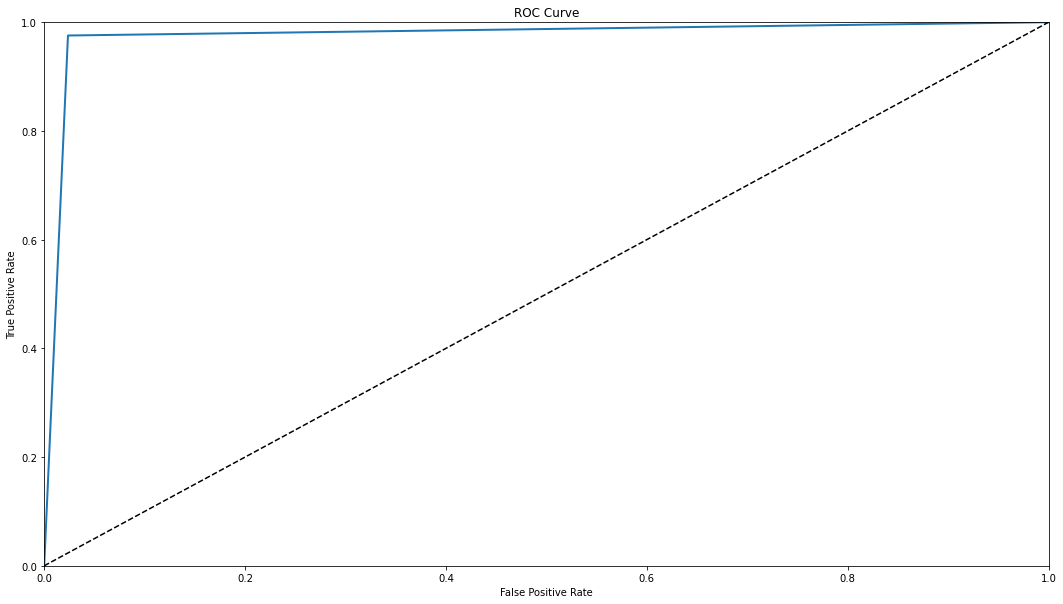

In [62]:
ex.roc_curve_plot(nfpr, ntpr, y_train, y_train_pred)